In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import math 
import sys

#Ignore all warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load In datasets

df_features = pd.read_csv("features.csv")
df_stores = pd.read_csv("stores.csv")
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

I will inspect the head of all dataframes here to see what we are working with.

In [3]:
df_features.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [4]:
df_stores.head(10)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [5]:
df_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [6]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [8]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


It appears the features dataframe has substantial null values and we will need to dig into that to see what is going on.


In [11]:
#Get some preliminary statistics on the dataframe.
df_features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [12]:
df_features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [13]:
# lowercase all the column names and replace spaces with _
df_train.columns = df_train.columns.str.lower().str.replace(' ', '_')
df_stores.columns = df_stores.columns.str.lower().str.replace(' ', '_')
df_features.columns = df_features.columns.str.lower().str.replace(' ', '_')

There is substantial null vlaues for Markdown1 - 5 columns. There is not as many null values for CPI and unemployment. 

In [14]:
df_features

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


# Preliminary EDA

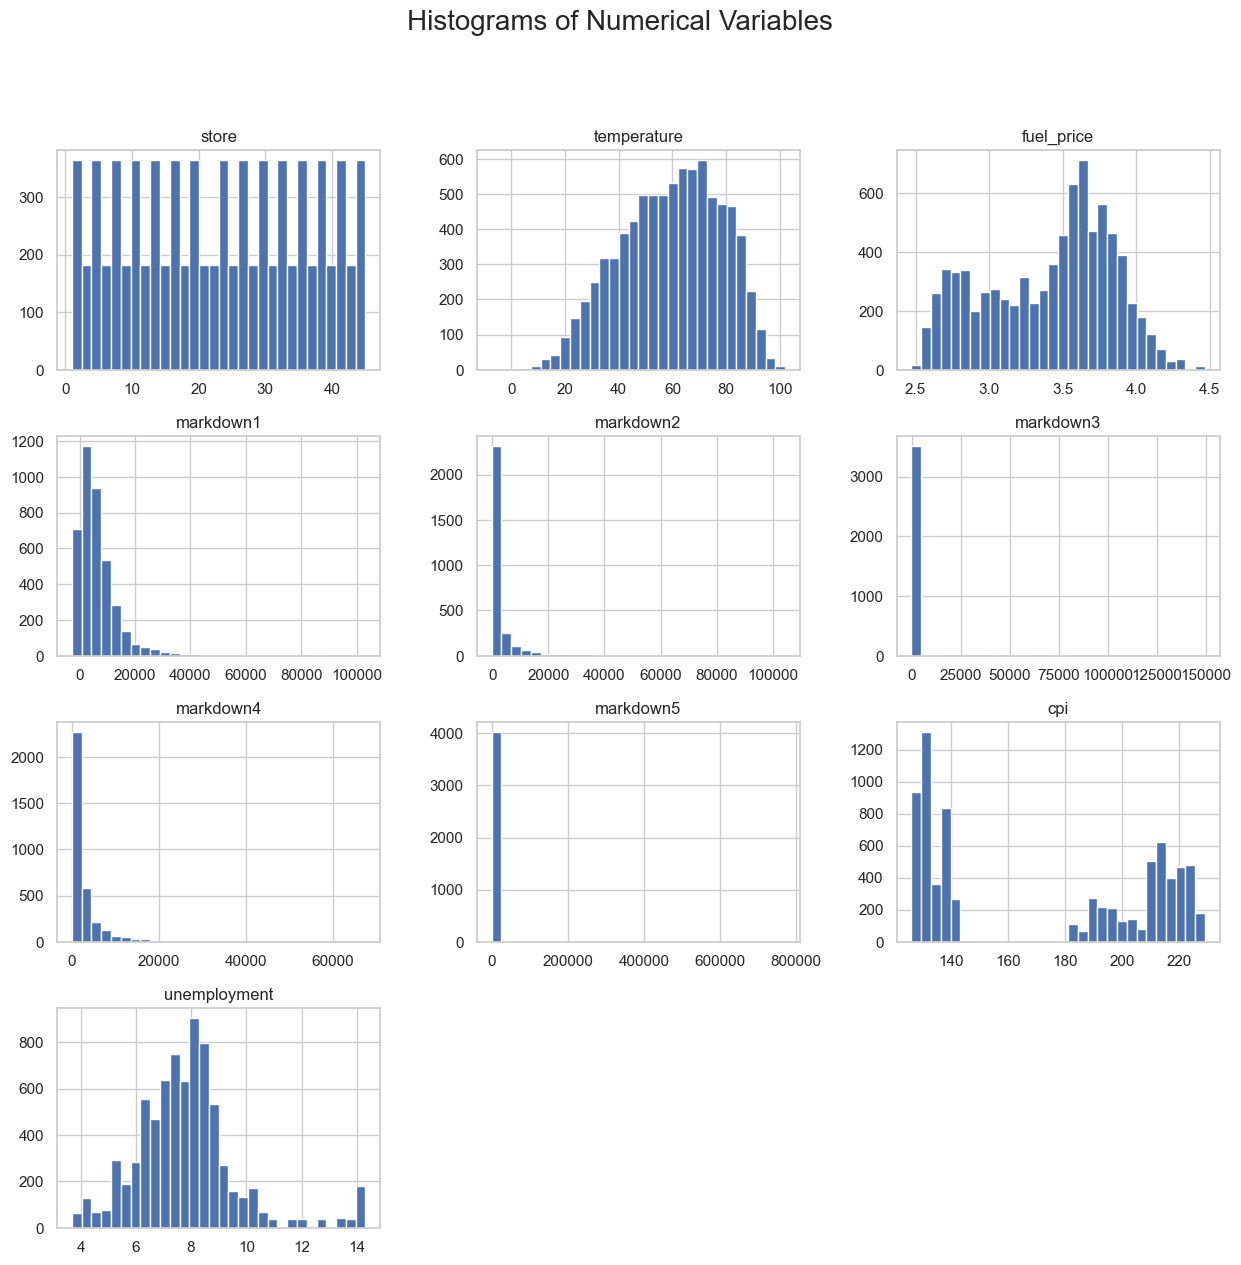

In [15]:
# Setting plot style
sns.set(style="whitegrid")

# Plot histograms for numerical variables
df_features.hist(bins=30, figsize=(15, 14))
plt.suptitle('Histograms of Numerical Variables', fontsize=20)
plt.show()

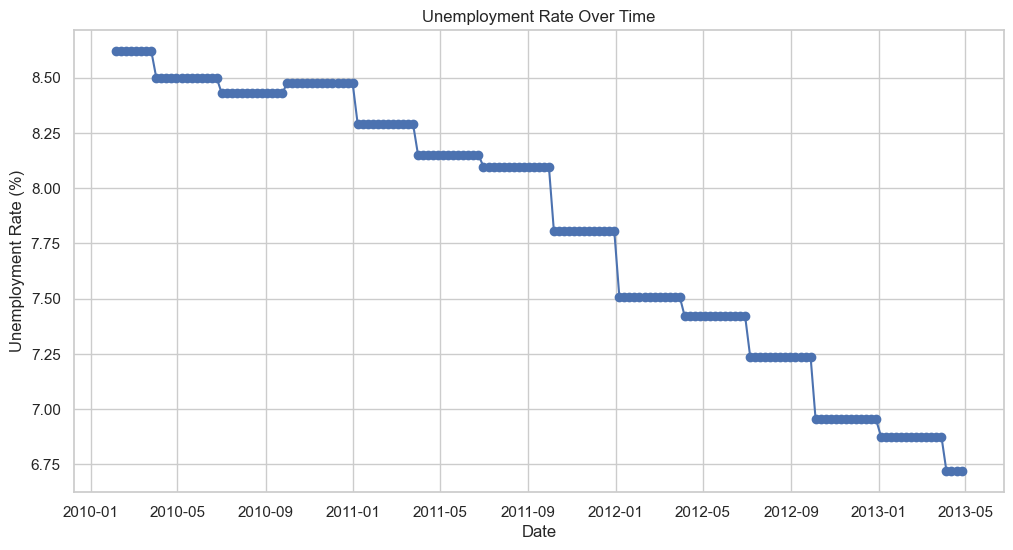

In [16]:
# Convert the 'date' column to datetime format
df_features['date'] = pd.to_datetime(df_features['date'])  # Let Pandas infer the format

# Group by 'date' and calculate the average unemployment rate
df_grouped = df_features.groupby('date')['unemployment'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['date'], df_grouped['unemployment'], marker='o', linestyle='-')

# Adding titles and labels
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')

# Show plot
plt.grid(True)
plt.show()

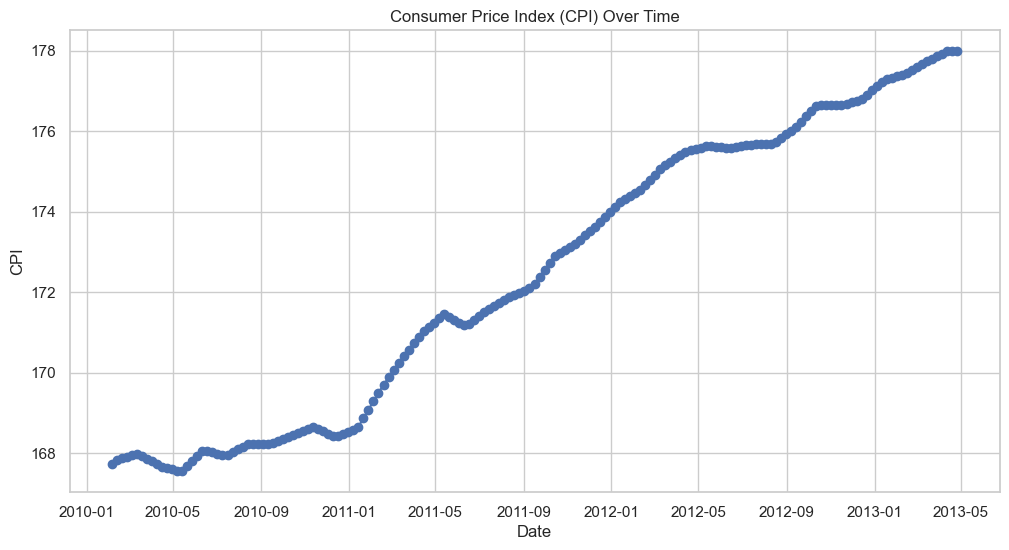

In [17]:
# Group by 'Date' and calculate the average CPI
df_grouped_cpi = df_features.groupby('date')['cpi'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df_grouped_cpi['date'], df_grouped_cpi['cpi'], marker='o', linestyle='-')

# Adding titles and labels
plt.title('Consumer Price Index (CPI) Over Time')
plt.xlabel('Date')
plt.ylabel('CPI')

# Show plot
plt.grid(True)
plt.show()

In [18]:
# filling missing values
df_features['cpi'].fillna(df_features['cpi'].median(),inplace=True)
df_features['unemployment'].fillna(df_features['unemployment'].median(),inplace=True)

C:\Users\Chris\AppData\Local\Temp\ipykernel_27204\3803472090.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_features['cpi'].fillna(df_features['cpi'].median(),inplace=True)
C:\Users\Chris\AppData\Local\Temp\ipykernel_27204\3803472090.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [19]:
# replacing the markdown values with 0, as there is no information in the dataset on how these values are obtained and what they actually mean
for i in range(1, 6):
    df_features["markdown" + str(i)] = df_features["markdown" + str(i)].apply(lambda x: 0 if x < 0 else x)
    df_features["markdown" + str(i)].fillna(value=0, inplace=True)

C:\Users\Chris\AppData\Local\Temp\ipykernel_27204\2139483102.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_features["markdown" + str(i)].fillna(value=0, inplace=True)


In [20]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         8190 non-null   int64         
 1   date          8190 non-null   datetime64[ns]
 2   temperature   8190 non-null   float64       
 3   fuel_price    8190 non-null   float64       
 4   markdown1     8190 non-null   float64       
 5   markdown2     8190 non-null   float64       
 6   markdown3     8190 non-null   float64       
 7   markdown4     8190 non-null   float64       
 8   markdown5     8190 non-null   float64       
 9   cpi           8190 non-null   float64       
 10  unemployment  8190 non-null   float64       
 11  isholiday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [21]:
df_features.head()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [22]:
df_train.shape, df_stores.shape, df_features.shape

((421570, 5), (45, 3), (8190, 12))

# DF Merging

Merging DataFrames
Merging 3 dataframes:

Features.csv:

Column wise description¶
Store: Denotes the Store Number
Date: Dates (Data) from 2010 - 2012
Temperature: Temperature in Fahrenheit
Fuel Price: Price of Fuel that day
Markdown1, Markdown2, Markdown3, Markdown4: Anonymized data related to promotional markdowns at Walmart
CPI: The consumer price index. It measures the monthly changes in prices paid by US consumers
Unemployement: Rate of Unemployment
IsHoliday: Is that particular day holiday or working day

train.csv: This is the historical training data, which covers 2010–02–05 to 2012–11–01, with following fields:

Store: The store number
Dept: The department number
Date: The week
Weekly_Sales: Sales for the given department in the given store
IsHoliday: Whether the week is a special holiday week
stores.csv: This file contains anonymized information about the 45 stores, indicating the type and size of the store:

Store: Stores numbered from 1 to 45
Type: Store type has been provided, there are 3 types — A, B and C
Size: Stores size has provided

In [56]:
#Merging the train and stores Dataframes.
train_df = pd.merge(df_train,df_stores,on='store',how='left')

In [57]:
#Inspecting results
train_df.head()

,store,dept,date,weekly_sales,isholiday,type,size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [58]:
# Convert store columns to string to ensure consistency
df_features['store'] = df_features['store'].astype(str)
df_train['store'] = df_train['store'].astype(str)
df_stores['store'] = df_stores['store'].astype(str)

# Convert date columns to datetime if they are not already
df_features['date'] = pd.to_datetime(df_features['date'])
df_train['date'] = pd.to_datetime(df_train['date'])

# Strip any leading/trailing spaces in the store columns
df_features['store'] = df_features['store'].str.strip()
df_train['store'] = df_train['store'].str.strip()
df_stores['store'] = df_stores['store'].str.strip()

In [59]:
# Merge df_features with df_train on 'store' and 'date'
merged_df = pd.merge(df_features, df_train, on=['store', 'date'], how='inner')

# Merge the result with df_stores on 'store' only
final_merged_df = pd.merge(merged_df, df_stores, on='store', how='inner')

In [60]:
final_merged_df.head()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday_x,dept,weekly_sales,isholiday_y,type,size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,False,A,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,False,A,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,False,A,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,False,A,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,False,A,151315


In [28]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   store         421570 non-null  object        
 1   date          421570 non-null  datetime64[ns]
 2   temperature   421570 non-null  float64       
 3   fuel_price    421570 non-null  float64       
 4   markdown1     421570 non-null  float64       
 5   markdown2     421570 non-null  float64       
 6   markdown3     421570 non-null  float64       
 7   markdown4     421570 non-null  float64       
 8   markdown5     421570 non-null  float64       
 9   cpi           421570 non-null  float64       
 10  unemployment  421570 non-null  float64       
 11  isholiday_x   421570 non-null  bool          
 12  dept          421570 non-null  int64         
 13  weekly_sales  421570 non-null  float64       
 14  isholiday_y   421570 non-null  bool          
 15  type          421

In [29]:
final_merged_df['date'] = pd.to_datetime(final_merged_df['date'],errors='coerce')
final_merged_df.sort_values(by=['date'],inplace=True)
final_merged_df.set_index(final_merged_df.date, inplace=True)
final_merged_df.head()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday_x,dept,weekly_sales,isholiday_y,type,size
date,,,,,,,,,,,,,,,,,
2010-02-05,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,False,A,151315
2010-02-05,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,3,14612.19,False,B,103681
2010-02-05,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,4,26323.15,False,B,103681
2010-02-05,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,5,36414.63,False,B,103681
2010-02-05,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,6,11437.81,False,B,103681


In [69]:
#checking whether the column IsHoliday_x and IsHoliday_y are same or not
final_merged_df['isholiday_x'].isin(final_merged_df['isholiday_y']).all()

KeyError: 'isholiday_x'

In [68]:
#Since these two columns are same so drop any one column and make another column as IsHoliday
final_merged_df.drop(columns='isholiday_x',inplace=True)
final_merged_df.rename(columns={"isholiday_y" : "IsHoliday"}, inplace=True)
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   store         421570 non-null  object        
 1   date          421570 non-null  datetime64[ns]
 2   temperature   421570 non-null  float64       
 3   fuel_price    421570 non-null  float64       
 4   markdown1     421570 non-null  float64       
 5   markdown2     421570 non-null  float64       
 6   markdown3     421570 non-null  float64       
 7   markdown4     421570 non-null  float64       
 8   markdown5     421570 non-null  float64       
 9   cpi           421570 non-null  float64       
 10  unemployment  421570 non-null  float64       
 11  dept          421570 non-null  int64         
 12  weekly_sales  421570 non-null  float64       
 13  IsHoliday     421570 non-null  bool          
 14  type          421570 non-null  object        
 15  size          421

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

final_merged_df['IsHoliday'] = le.fit_transform(final_merged_df['IsHoliday'])
final_merged_df['type'] = le.fit_transform(final_merged_df['type'])

In [71]:
final_merged_df.head()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,dept,weekly_sales,IsHoliday,type,size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,24924.50,0,0,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,50605.27,0,0,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,13740.12,0,0,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,39954.04,0,0,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,32229.38,0,0,151315


In [33]:
#Outlier Detection and Abnormalities
agg_data = final_merged_df.groupby(['store', 'dept']).weekly_sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.head()

,store,dept,max,min,mean,median,std
0,1,1,57592.12,14537.37,22513.322937,18535.48,9854.349032
1,1,2,65615.36,35819.83,46102.090420,45561.85,3440.673222
2,1,3,51159.17,6165.73,13150.478042,10366.85,8708.978853
3,1,4,47893.23,32497.43,36964.154476,36579.96,2930.698313
4,1,5,85676.09,11570.27,24257.941119,21183.42,11330.286495


In [34]:
agg_data.isnull().sum()

store      0
dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

final_merged_df['IsHoliday'] = le.fit_transform(final_merged_df['IsHoliday'])
final_merged_df['type'] = le.fit_transform(final_merged_df['type'])

In [36]:
final_merged_df.head()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,dept,weekly_sales,IsHoliday,type,size
date,,,,,,,,,,,,,,,,
2010-02-05,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,24924.50,0,0,151315
2010-02-05,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,3,14612.19,0,1,103681
2010-02-05,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,4,26323.15,0,1,103681
2010-02-05,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,5,36414.63,0,1,103681
2010-02-05,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,6,11437.81,0,1,103681


In [37]:
final_merged_df['dept'].nunique()

81

In [38]:
final_merged_df['IsHoliday'].nunique()

2

In [39]:
final_merged_df['type'].nunique()

3

In [40]:
sliced = ['weekly_sales', 'store']
sales = final_merged_df[sliced].sort_values(by='weekly_sales', ascending=True)

In [41]:
sales

,weekly_sales,store
date,,
2010-10-08,-4988.94,28
2011-09-02,-3924.00,35
2010-02-26,-1750.00,45
2012-03-09,-1699.00,16
2011-03-25,-1321.48,28
...,...,...
2010-11-26,474330.10,14
2010-11-26,627962.93,35
2011-11-25,630999.19,10


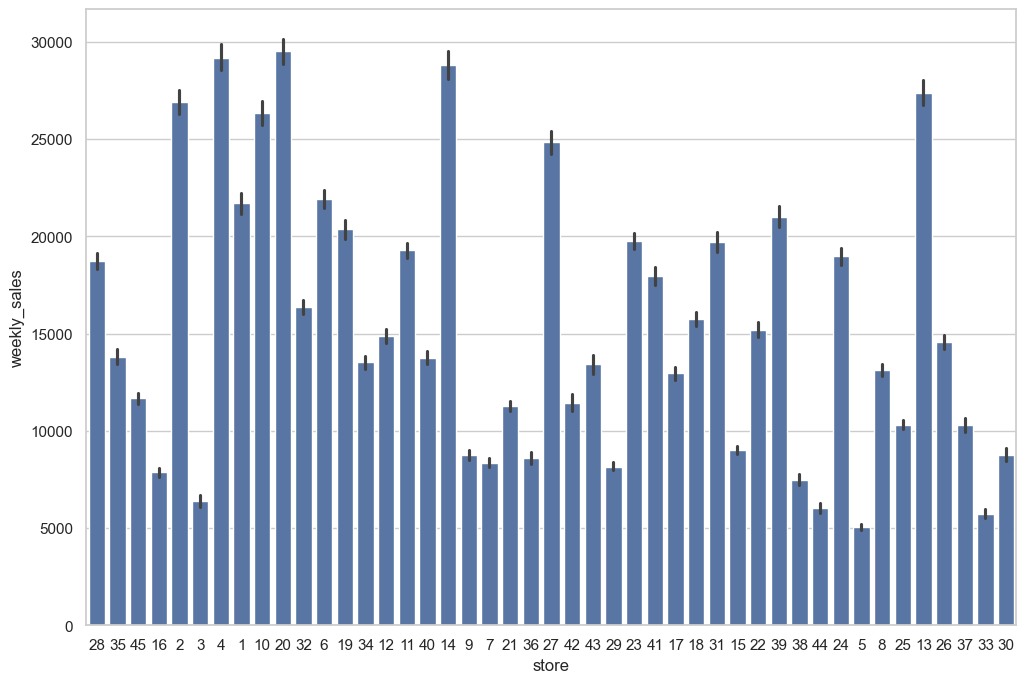

In [42]:
plt.figure(figsize=(12,8))
sns.barplot(x='store',y='weekly_sales',data=sales)
plt.show()

In [43]:
import plotly.graph_objects as go
import plotly.offline as po

# average of weekly sales by department (sorted)
avg_sales_dept = final_merged_df.groupby("dept")["weekly_sales"].mean().sort_values()

fig = go.Figure()

fig.add_trace(go.Bar(y=avg_sales_dept.values,
                    text=avg_sales_dept.index,
                     textposition='outside')
             )


fig.update_traces(marker_color='darkcyan',
                  marker_line_color='darkcyan',
                  marker_line_width=1.5,
                 )

fig.update_layout(title_text='Average Weekly Sales by Department',
                  xaxis_title_text="Department Number",   # xaxis label
                  xaxis_showticklabels=False,
                  yaxis_title_text="Average Sales") # yaxis label)


fig.show()

In [45]:
# average of weekly sales by store (sorted)
avg_sales_store = final_merged_df.groupby("store")["weekly_sales"].mean().sort_values()
fig = go.Figure()

fig.add_trace(go.Bar(y=avg_sales_store.values,
                    text=avg_sales_store.index,
                     textposition='outside'))


fig.update_traces(marker_color='rosybrown',
                  marker_line_color='darkmagenta',
                  marker_line_width=1.5,)

fig.update_layout(title_text='Average Weekly Sales by Store',
                  xaxis=dict(
                      title_text="Store Number",
                      showticklabels=False,
                      ticks='outside',
                      tickfont=dict(
                          family='Arial',
                          size=12,
                          color='rgb(82, 82, 82)')),
                       yaxis=dict(
                             title_text="Average Sales"))

fig.show()

## Data Modeling

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the features for the model (excluding the target variable 'weekly_sales' and 'date')

# Target variable
target = final_merged_df['weekly_sales']

features = final_merged_df.drop(columns=['weekly_sales', 'date'])


In [73]:
features

,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,dept,IsHoliday,type,size
0,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,1,0,0,151315
1,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2,0,0,151315
2,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,0,0,151315
3,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,4,0,0,151315
4,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,5,0,0,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,93,0,1,118221
421566,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,94,0,1,118221
421567,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,95,0,1,118221
421568,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,97,0,1,118221


In [97]:
features['store'] = features['store'].astype(int)

In [98]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   store         421570 non-null  int32  
 1   temperature   421570 non-null  float64
 2   fuel_price    421570 non-null  float64
 3   markdown1     421570 non-null  float64
 4   markdown2     421570 non-null  float64
 5   markdown3     421570 non-null  float64
 6   markdown4     421570 non-null  float64
 7   markdown5     421570 non-null  float64
 8   cpi           421570 non-null  float64
 9   unemployment  421570 non-null  float64
 10  dept          421570 non-null  int64  
 11  IsHoliday     421570 non-null  int64  
 12  type          421570 non-null  int32  
 13  size          421570 non-null  int64  
dtypes: float64(9), int32(2), int64(3)
memory usage: 41.8 MB


In [74]:
target

0         24924.50
1         50605.27
2         13740.12
3         39954.04
4         32229.38
            ...   
421565     2487.80
421566     5203.31
421567    56017.47
421568     6817.48
421569     1076.80
Name: weekly_sales, Length: 421570, dtype: float64

### Linear Regression

In [100]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [76]:
# Making predictions on test set
y_pred = model.predict(X_test)

In [77]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)

479581736.54739094
0.0877708885279549


### Lasso & Ridge Regression

In [78]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Feature Engineering: Adding interaction terms using PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Apply scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Regularization: Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_pred = ridge_model.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

In [79]:
print(ridge_r2 * 100)

11.29634437578354


In [80]:
# Regularization: Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
lasso_pred = lasso_model.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

c:\Users\Chris\anaconda3\envs\tf-gpu2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.429e+13, tolerance: 1.731e+10



In [81]:
print(lasso_r2 * 100)

11.30145616768642


It appears that these Ridge and Lasso models do not produce any meaningful results. I will try other models.

### Decision Tree Models

The first model I will use will be a random forest model.

In [82]:
import time

In [83]:
# Start time
start_time = time.time()
rf_model_1 = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model_1.fit(X_train, y_train)
rf_pred_1 = rf_model_1.predict(X_test)
rf_mse_1 = mean_squared_error(y_test, rf_pred_1)
rf_r2_1 = r2_score(y_test, rf_pred_1)
# End time
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)
print("R^2 VALUE: ", rf_r2_1)

Execution Time:  2.6988537629445393
R^2 VALUE:  0.9455379144945811


Model: Random Forest Regression (n_est = 50, max_depth = 100)

In [84]:
# Model: Random Forest Regressor (n_estimators=50, max_depth=100)
# Start time
start_time = time.time()
rf_model_1_100 = RandomForestRegressor(n_estimators=50, max_depth=100, random_state=42)
rf_model_1_100.fit(X_train, y_train)
rf_pred_1_100  = rf_model_1_100.predict(X_test)
rf_mse_1_100 = mean_squared_error(y_test, rf_pred_1_100)
rf_r2_1_100 = r2_score(y_test, rf_pred_1_100)
# End time
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)
print("R^2 VALUE: ", rf_r2_1_100)

Execution Time:  3.2681998014450073
R^2 VALUE:  0.9455379144945811


Model: Random Forest Regression (n_est = 100)

In [85]:
# Model: Random Forest Regressor (n_estimators=100)
# Start time
start_time = time.time()
rf_model_2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_2.fit(X_train, y_train)
rf_pred_2 = rf_model_2.predict(X_test)
rf_mse_2 = mean_squared_error(y_test, rf_pred_2)
rf_r2_2 = r2_score(y_test, rf_pred_2)
# End time
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)
print("R^2 VALUE: ", rf_r2_2)

Execution Time:  7.468071854114532
R^2 VALUE:  0.9452970380680744


Model: Random Forest Regression (n_est = 100, max_depth = 100)

In [86]:
# Model: Random Forest Regressor (n_estimators=100)
# Start time
start_time = time.time()
rf_model_2_100 = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)
rf_model_2_100.fit(X_train, y_train)
rf_pred_2_100 = rf_model_2_100.predict(X_test)
rf_mse_2_100 = mean_squared_error(y_test, rf_pred_2_100)
rf_r2_2_100 = r2_score(y_test, rf_pred_2_100)
# End time
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)
print("R^2 VALUE: ", rf_r2_2_100)

Execution Time:  7.932082919279734
R^2 VALUE:  0.9452970380680744


### XGB Regressor

In [101]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(n_estimators = 50)
xgbr.fit(X_train, y_train)
xgb_pred = xgbr.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
print("R^2 VALUE: ", xgb_r2)

R^2 VALUE:  0.895536996100363


In [102]:
xgboost_accuracy = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgboost_accuracy)

XGBoost Regressor Accuracy -  89.55369961003629


In [103]:
from xgboost import XGBRegressor
xgbr1 = XGBRegressor(n_estimators = 100)
xgbr1.fit(X_train, y_train)
xgb_pred_1 = xgbr.predict(X_test)
xgb_mse_1 = mean_squared_error(y_test, xgb_pred_1)
xgb_r2_1 = r2_score(y_test, xgb_pred_1)
print("R^2 VALUE: ", xgb_r2_1)

R^2 VALUE:  0.895536996100363


In [104]:
xgboost_accuracy = xgbr1.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgboost_accuracy)

XGBoost Regressor Accuracy -  91.53531686493285


In [105]:
xgbr2 = XGBRegressor(n_estimators=200)
xgbr2.fit(X_train, y_train)
xgb_pred_2 = xgbr2.predict(X_test)
xgb_mse_2 = mean_squared_error(y_test, xgb_pred_2)
xgb_r2_2 = r2_score(y_test, xgb_pred_2)
print("R^2 VALUE: ", xgb_r2_2)

R^2 VALUE:  0.9292554757990459


In [106]:
xgboost_accuracy = xgbr2.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgboost_accuracy)

XGBoost Regressor Accuracy -  92.92554757990459


### Gradient Boosting - 50 Estimators

In [108]:
# Model: Gradient Boosting Regressor
start_time = time.time()
gb_model_1 = GradientBoostingRegressor(n_estimators=50, random_state=42)
gb_model_1.fit(X_train, y_train)
gb_pred_1 = gb_model_1.predict(X_test)
gb_mse_1 = mean_squared_error(y_test, gb_pred_1)
gb_r2_1 = r2_score(y_test, gb_pred_1)
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)
print("R^2 VALUE: ", gb_r2_1)

Execution Time:  0.7984210650126139
R^2 VALUE:  0.6433843172097438


Gradient Boost model did not perform as well as I had thought it would have. Let's continue to try to use this model, but instead increase the number of estimators.

### Gradient Boosting - 100 Estimators

In [109]:
# Model: Gradient Boosting Regressor
start_time = time.time()
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred_2 = gb_model.predict(X_test)
gb_mse_2 = mean_squared_error(y_test, gb_pred_2)
gb_r2_2 = r2_score(y_test, gb_pred_2)
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)
print("R^2 VALUE: ", gb_r2_2)

Execution Time:  1.730020562807719
R^2 VALUE:  0.7339952513811907


There is some improvement. I will attempt another pass, but with more estimators this time.

### Gradient Boosting - 200 Estimators

In [110]:
# Model: Gradient Boosting Regressor
start_time = time.time()
gb_model = GradientBoostingRegressor(n_estimators=200, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred_3 = gb_model.predict(X_test)
gb_mse_3 = mean_squared_error(y_test, gb_pred_3)
gb_r2_3 = r2_score(y_test, gb_pred_3)
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)
print("R^2 VALUE: ", gb_r2_3)

Execution Time:  3.442593725522359
R^2 VALUE:  0.7858350653474119


### Results

In [111]:
# Compile the results with MSE and R^2
results = {
    "Model": ["Ridge Regression", "Lasso Regression", "Random Forest", "Random Forest" ,"Random Forest", "Random Forest", "Gradient Boosting", "Gradient Boosting", "Gradient Boosting", "XGB Regressor", "XGB Regressor", "XGB Regressor"],
    "MSE": [ridge_mse, lasso_mse, rf_mse_1, rf_mse_1_100, rf_mse_2, rf_mse_2_100, gb_mse_1, gb_mse_2, gb_mse_3, xgb_mse, xgb_mse_1, xgb_mse_2],
    "R² Score": [ridge_r2, lasso_r2, rf_r2_1, rf_r2_1_100, rf_r2_2, rf_r2_2_100, gb_r2_1, gb_r2_2, gb_r2_3, xgb_r2, xgb_r2_1, xgb_r2_2]
}

results_df = pd.DataFrame(results)
results_df

,Model,MSE,R² Score
0,Ridge Regression,4.663374e+08,0.112963
1,Lasso Regression,4.663105e+08,0.113015
2,Random Forest,2.863209e+07,0.945538
3,Random Forest,2.863209e+07,0.945538
4,Random Forest,2.875872e+07,0.945297
5,Random Forest,2.875872e+07,0.945297
6,Gradient Boosting,1.874818e+08,0.643384
7,Gradient Boosting,1.398454e+08,0.733995
8,Gradient Boosting,1.125919e+08,0.785835
9,XGB Regressor,5.491882e+07,0.895537


## Assessing Models - Train vs Test with Plot Visualization

### Ridge Regression

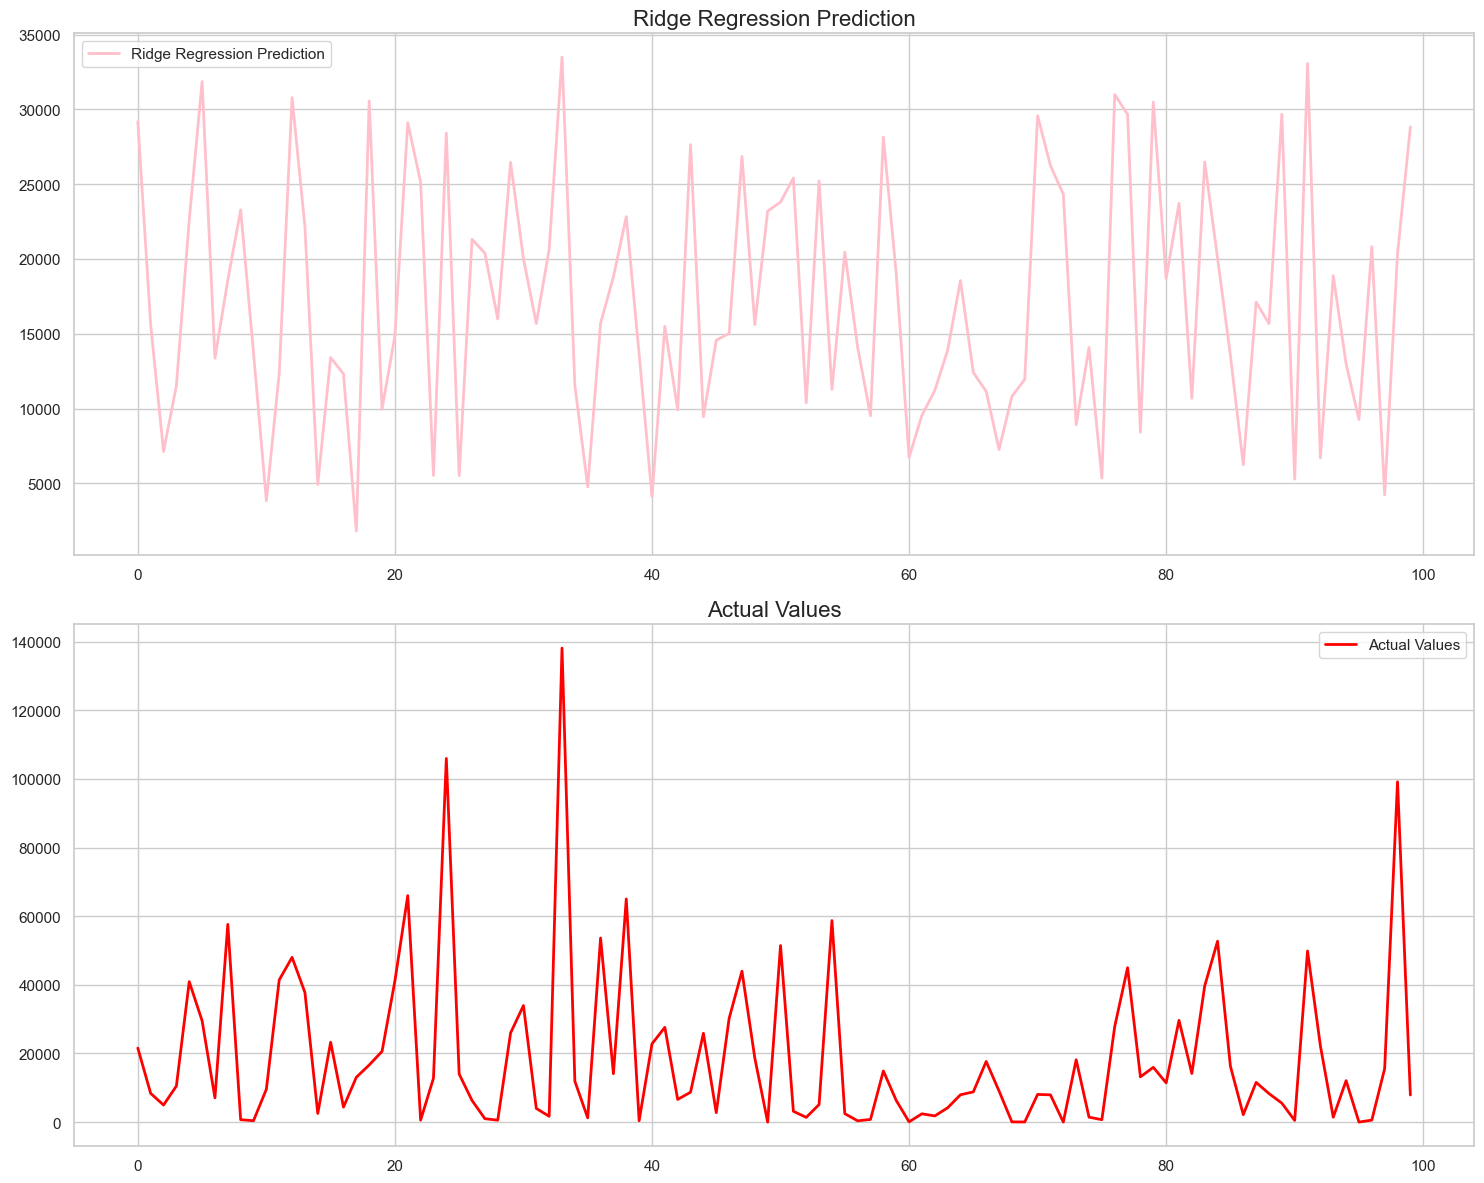

In [112]:
# Select a subset of the test data for visualization
n = 100  # Number of points to plot
y_test_subset = y_test[:n].values

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(15,12))

# First subplot: Ridge Regression predictions
ax[0].plot(ridge_pred[:n], label="Ridge Regression Prediction", linewidth=2.0, color='pink')
ax[0].set_title('Ridge Regression Prediction', fontsize=16)
ax[0].legend(loc="best")

# Second subplot: Actual values
ax[1].plot(y_test_subset, label="Actual Values", linewidth=2.0, color='red')
ax[1].set_title('Actual Values', fontsize=16)
ax[1].legend(loc="best")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

As expected, Ridge Regression did not perform well at all. Let's continue with our other models.

### Lasso Regression

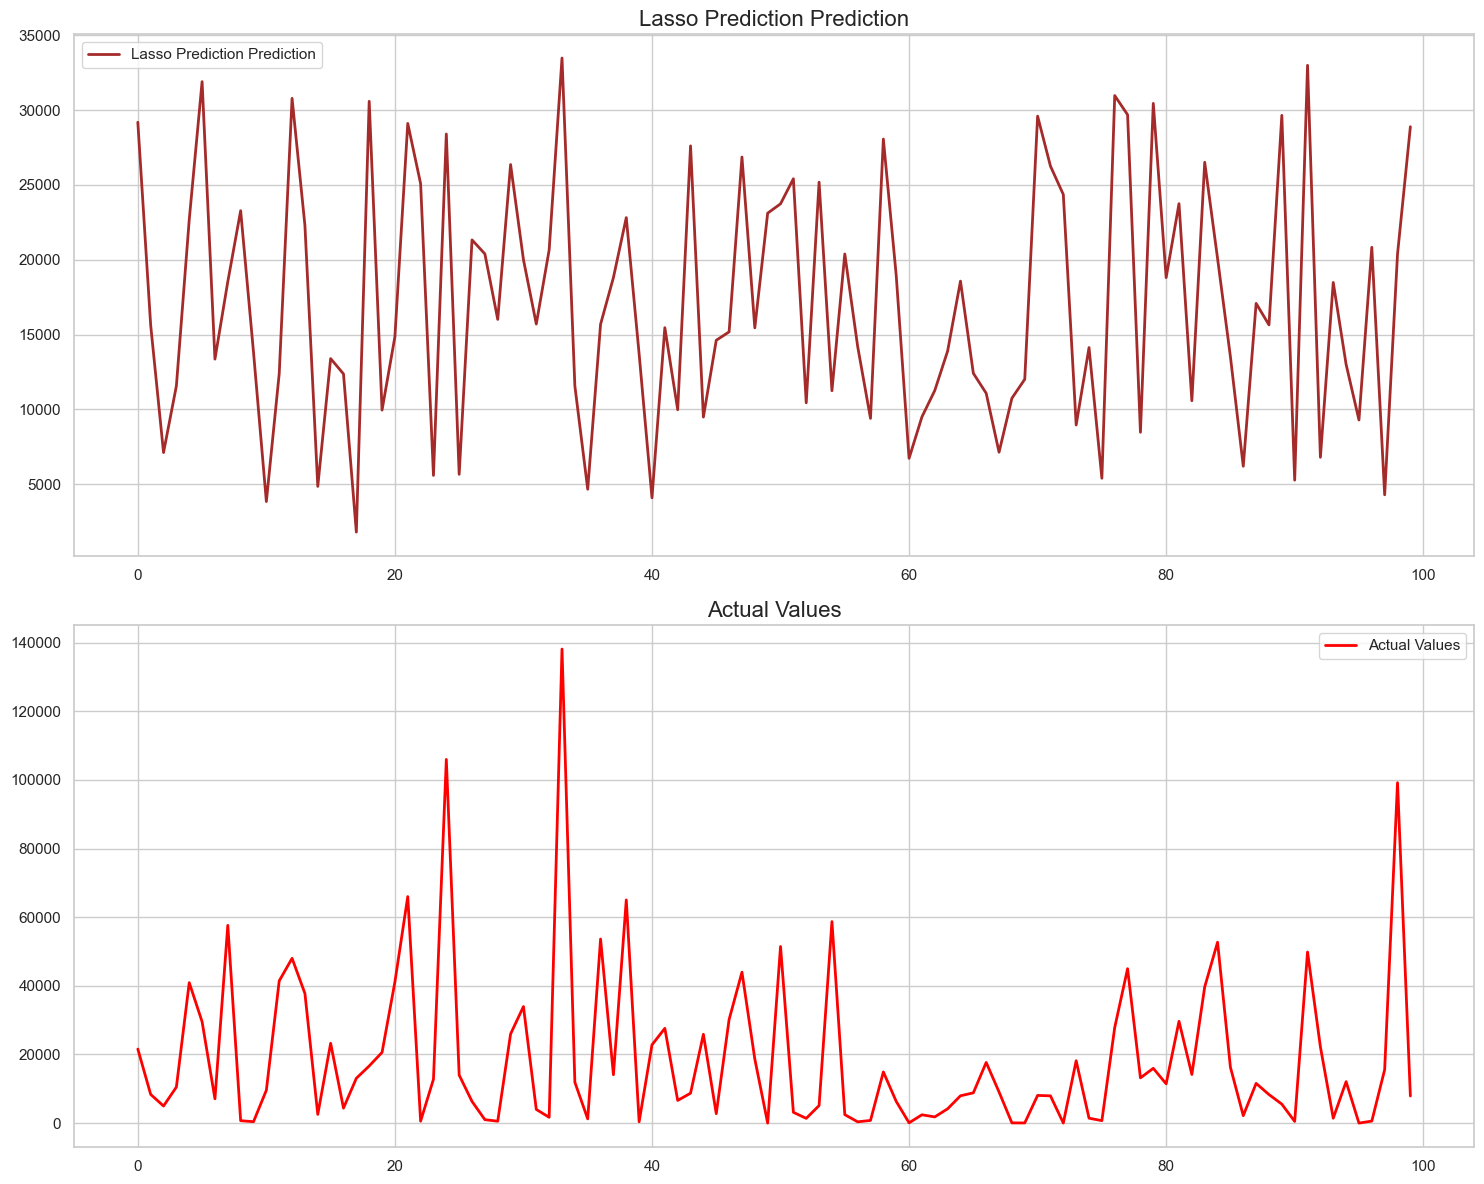

In [113]:
# Select a subset of the test data for visualization
n = 100  # Number of points to plot
y_test_subset = y_test[:n].values

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(15,12))

# First subplot: Lasso Prediction predictions
ax[0].plot(lasso_pred[:n], label="Lasso Prediction Prediction", linewidth=2.0, color='brown')
ax[0].set_title('Lasso Prediction Prediction', fontsize=16)
ax[0].legend(loc="best")

# Second subplot: Actual values
ax[1].plot(y_test_subset, label="Actual Values", linewidth=2.0, color='red')
ax[1].set_title('Actual Values', fontsize=16)
ax[1].legend(loc="best")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Similar to Ridge, Lasso regression also did not perform well at all. Let's continue with our other models.

### Random Forest Regression

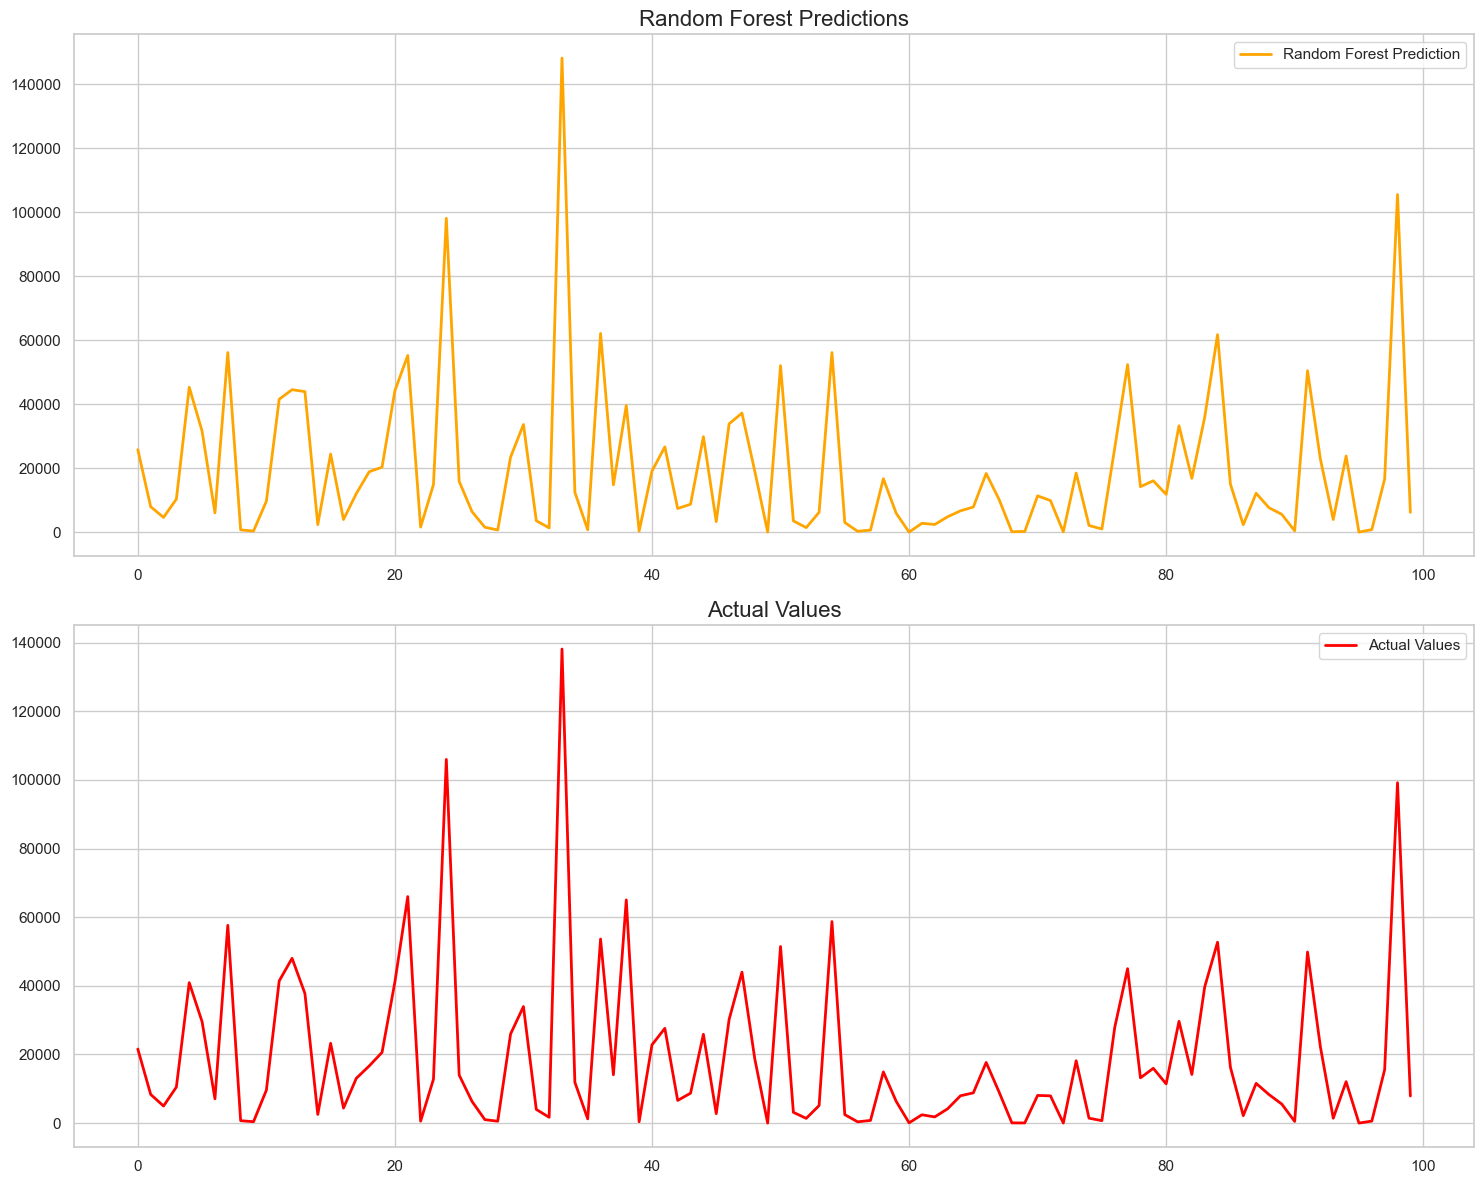

In [114]:
# Select a subset of the test data for visualization
n = 100  # Number of points to plot
y_test_subset = y_test[:n].values

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(15,12))

# First subplot: Random Forest predictions
ax[0].plot(rf_pred_2_100[:n], label="Random Forest Prediction", linewidth=2.0, color='orange')
ax[0].set_title('Random Forest Predictions', fontsize=16)
ax[0].legend(loc="best")

# Second subplot: Actual values
ax[1].plot(y_test_subset, label="Actual Values", linewidth=2.0, color='red')
ax[1].set_title('Actual Values', fontsize=16)
ax[1].legend(loc="best")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Random Forest Regression did extremely well at predicting the results! I will keep this in mind. Let's test the others.

### Gradient Boosting

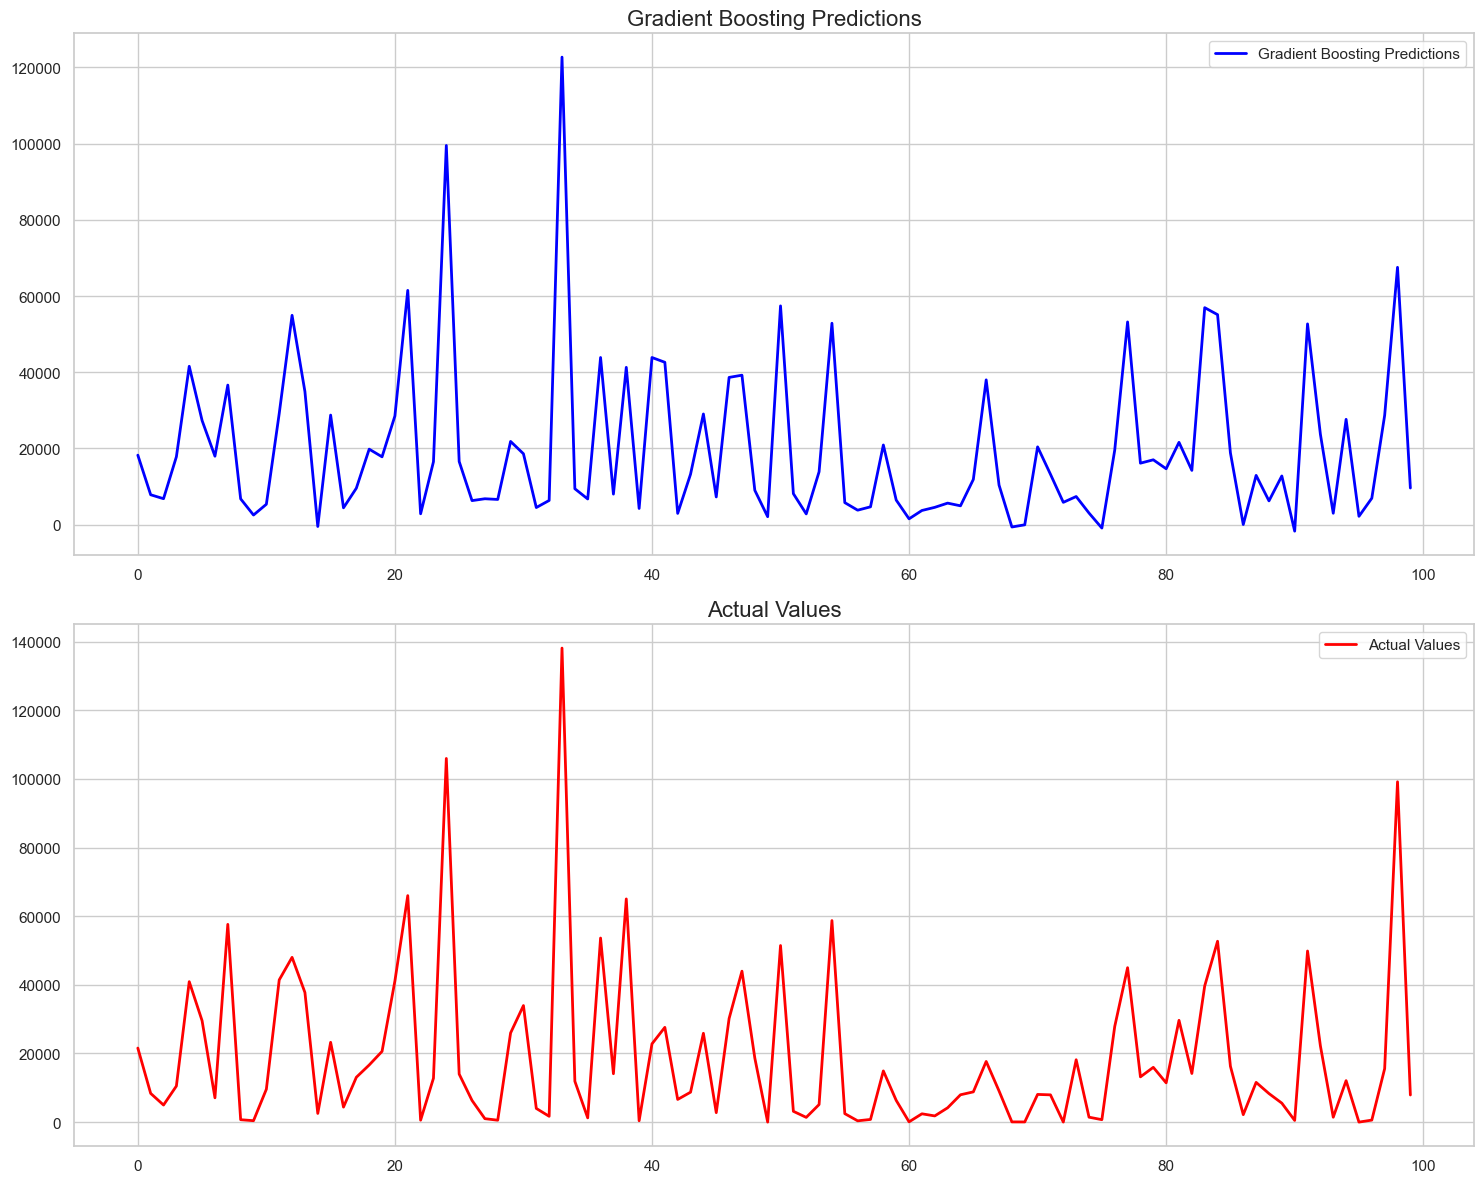

In [115]:
# Select a subset of the test data for visualization
n = 100  # Number of points to plot
y_test_subset = y_test[:n].values

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(15,12))

# First subplot: Gradient Boosting Predictions
ax[0].plot(gb_pred_3[:n], label="Gradient Boosting Predictions", linewidth=2.0, color='blue')
ax[0].set_title('Gradient Boosting Predictions', fontsize=16)
ax[0].legend(loc="best")

# Second subplot: Actual values
ax[1].plot(y_test_subset, label="Actual Values", linewidth=2.0, color='red')
ax[1].set_title('Actual Values', fontsize=16)
ax[1].legend(loc="best")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Gradient Boosting followed the same trend as the random forest, but it definitely performed worse.

### XGB Regressor

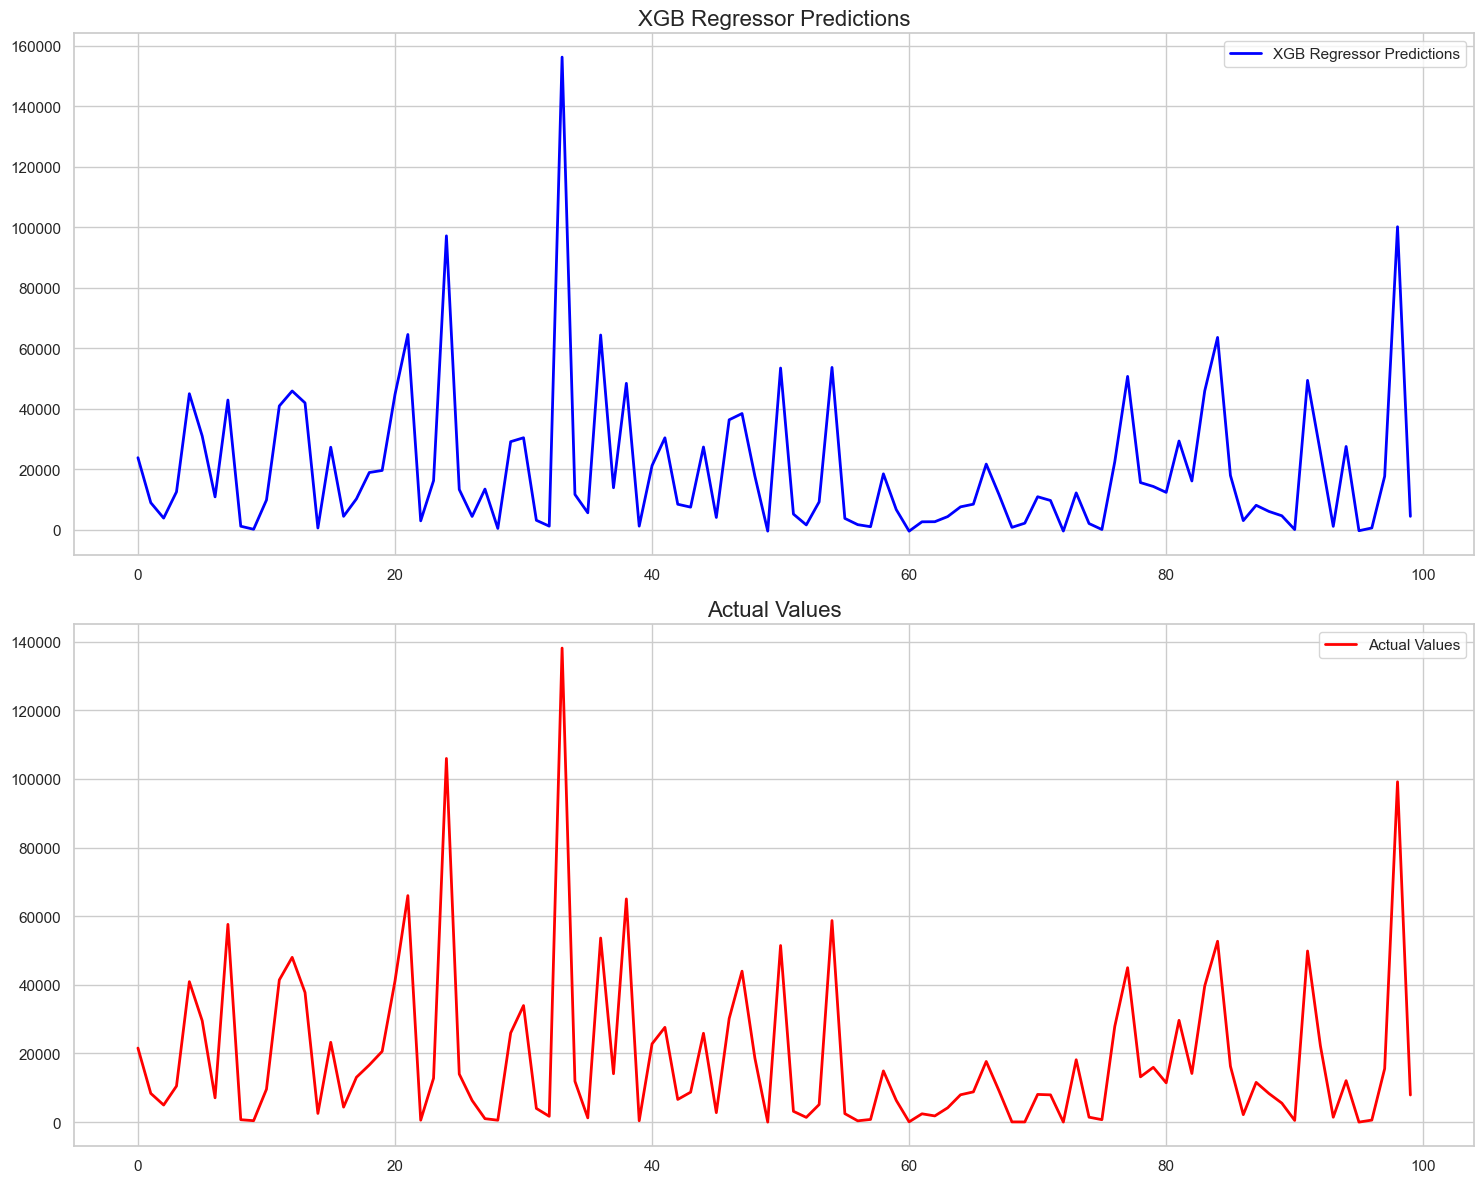

In [116]:
# Select a subset of the test data for visualization
n = 100  # Number of points to plot
y_test_subset = y_test[:n].values

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(15,12))

# First subplot: XGB Regressor Predictions
ax[0].plot(xgb_pred_2[:n], label="XGB Regressor Predictions", linewidth=2.0, color='blue')
ax[0].set_title('XGB Regressor Predictions', fontsize=16)
ax[0].legend(loc="best")

# Second subplot: Actual values
ax[1].plot(y_test_subset, label="Actual Values", linewidth=2.0, color='red')
ax[1].set_title('Actual Values', fontsize=16)
ax[1].legend(loc="best")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

The XGB Regression model did perform well, but appears to not perform as well as the Random Forest in terms of the peaks and nuances of the predictions.

C:\Users\Chris\AppData\Local\Temp\ipykernel_27204\2919710744.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Chris\AppData\Local\Temp\ipykernel_27204\2919710744.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




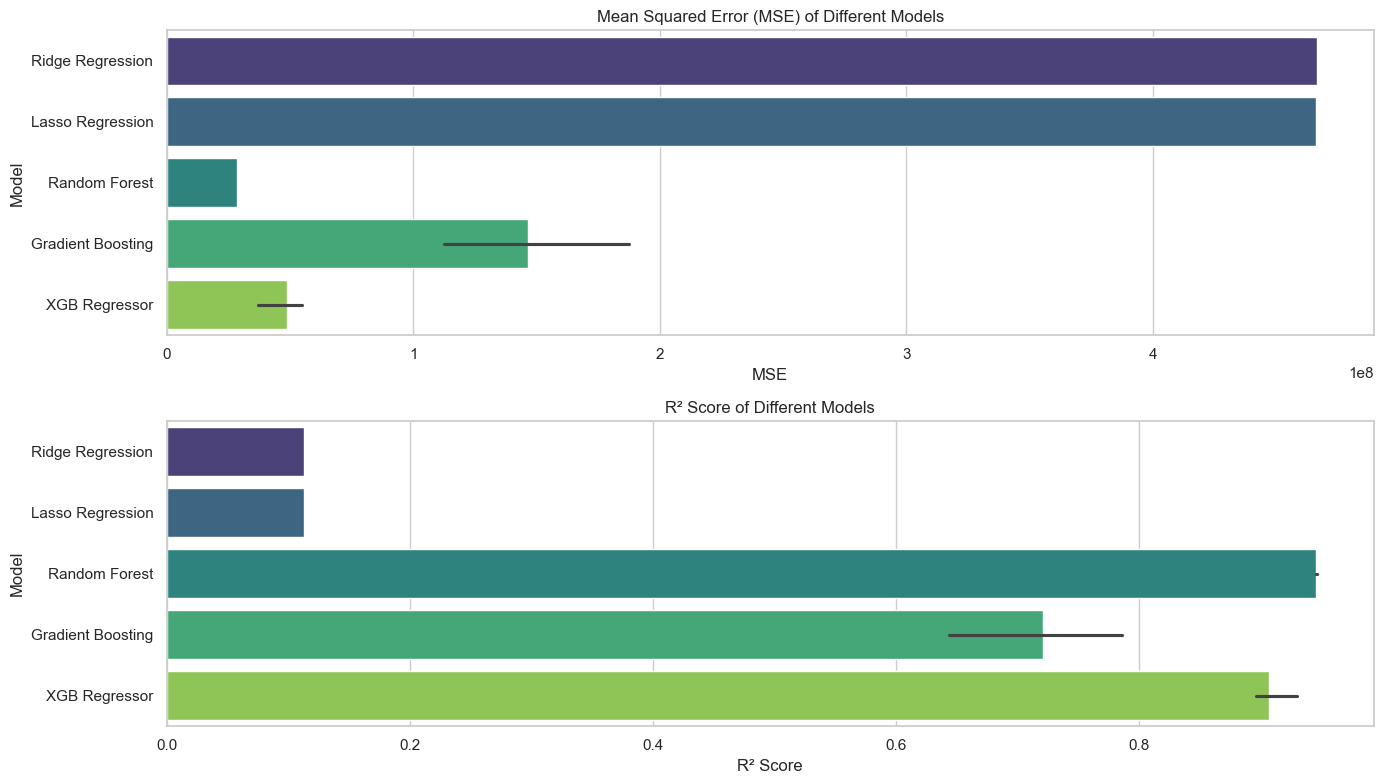

''

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results = {
    "Model": ["Ridge Regression", "Lasso Regression", "Random Forest", "Random Forest" ,"Random Forest", "Random Forest", "Gradient Boosting", "Gradient Boosting", "Gradient Boosting", "XGB Regressor", "XGB Regressor", "XGB Regressor"],
    "MSE": [ridge_mse, lasso_mse, rf_mse_1, rf_mse_1_100, rf_mse_2, rf_mse_2_100, gb_mse_1, gb_mse_2, gb_mse_3, xgb_mse, xgb_mse_1, xgb_mse_2],
    "R² Score": [ridge_r2, lasso_r2, rf_r2_1, rf_r2_1_100, rf_r2_2, rf_r2_2_100, gb_r2_1, gb_r2_2, gb_r2_3, xgb_r2, xgb_r2_1, xgb_r2_2]
}

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Set the style and size of the plots
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Create a bar plot for MSE
plt.subplot(2, 1, 1)
sns.barplot(x="MSE", y="Model", data=results_df, palette="viridis")
plt.title('Mean Squared Error (MSE) of Different Models')
plt.xlabel('MSE')
plt.ylabel('Model')

# Create a bar plot for R² Score
plt.subplot(2, 1, 2)
sns.barplot(x="R² Score", y="Model", data=results_df, palette="viridis")
plt.title('R² Score of Different Models')
plt.xlabel('R² Score')
plt.ylabel('Model')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


The Random Forest looks like it is the best model to use, as it has the lowest MSE, and highest R2 values.

## Forecasting - ARIMA (AutoRegressive Integrated Moving Average), Modified ARIMA, and SARIMA, (Seasonal ARIMA)

### ARIMA

In [120]:
from statsmodels.tsa.arima.model import ARIMA

In [122]:
final_merged_df['date'] = pd.to_datetime(final_merged_df['date'])

# Aggregate the data by week
weekly_sales = final_merged_df.groupby('date')['weekly_sales'].sum().reset_index()

# Set the date as the index
weekly_sales.set_index('date', inplace=True)

In [123]:
weekly_sales

,weekly_sales
date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30
...,...
2012-09-28,43734899.40
2012-10-05,47566639.31
2012-10-12,46128514.25


In [124]:
# Define the training period
train = weekly_sales.iloc[:-52]  # Use all but the last year for training
test = weekly_sales.iloc[-52:]   # Use the last year for testing

In [125]:
# Fit the ARIMA model
model = ARIMA(train, order=(5,1,0))  # (p,d,q) parameters can be tuned
model_fit = model.fit()

c:\Users\Chris\anaconda3\envs\tf-gpu2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\Chris\anaconda3\envs\tf-gpu2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\Chris\anaconda3\envs\tf-gpu2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



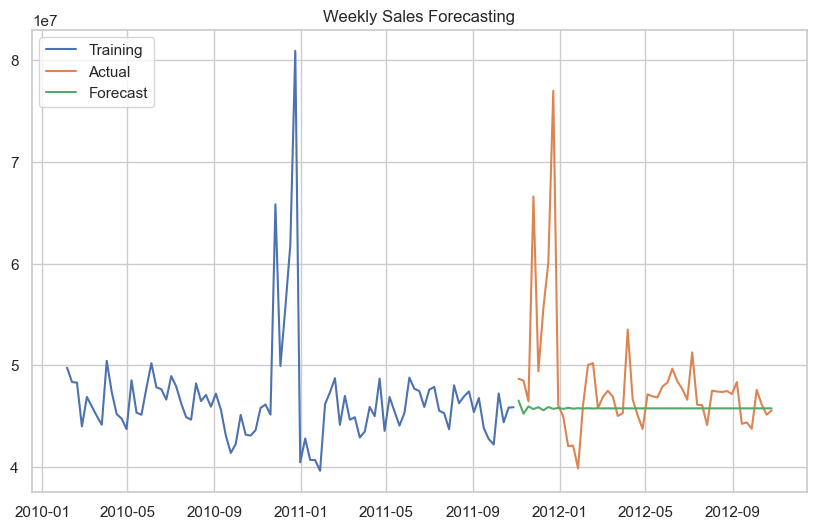

In [126]:
# Forecast for the test period
forecast = model_fit.forecast(steps=len(test))

# Plot the forecast against the actual values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.legend(loc='upper left')
plt.title('Weekly Sales Forecasting')
plt.show()

The ARIMA model did not forecast well at all. Let's try to tune it.

In [128]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np

final_merged_df['date'] = pd.to_datetime(final_merged_df['date'])

# Aggregate the final_merged_df by week
weekly_sales = final_merged_df.groupby('date')['weekly_sales'].sum().reset_index()

# Set the date as the index
weekly_sales.set_index('date', inplace=True)

# Define the training period
train = weekly_sales.iloc[:-52]  # Use all but the last year for training
test = weekly_sales.iloc[-52:]   # Use the last year for testing

# Grid search for ARIMA parameters
best_aic = np.inf
best_order = None
best_model = None

# Define a range of p, d, q values to try
p_values = range(0, 6)
d_values = range(0, 2)
q_values = range(0, 6)

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(train, order=(p, d, q))
                model_fit = model.fit()
                aic = model_fit.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
                    best_model = model_fit
            except Exception as e:
                continue

print(f"Best ARIMA order: {best_order} with AIC: {best_aic}")

# Use the best model for predictions
predictions = best_model.forecast(steps=len(test))

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print(f"RMSE for best ARIMA model: {rmse}")

c:\Users\Chris\anaconda3\envs\tf-gpu2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\Chris\anaconda3\envs\tf-gpu2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\Chris\anaconda3\envs\tf-gpu2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\Chris\anaconda3\envs\tf-gpu2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\Chris\anaconda3\envs\tf-gpu2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\Chris\anaconda3\envs\tf-gpu2\li

Best ARIMA order: (0, 1, 5) with AIC: 3050.934138206911
RMSE for best ARIMA model: 6263405.379480005


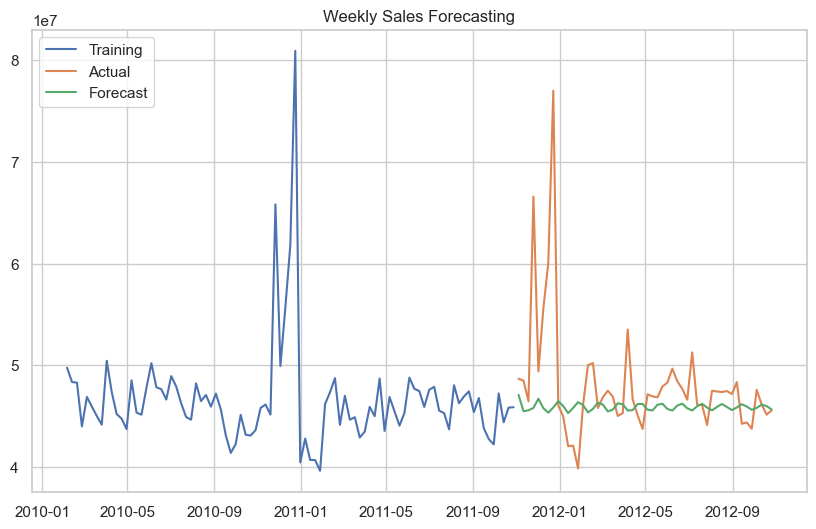

In [129]:
# Forecast for the test period
forecast = model_fit.forecast(steps=len(test))

# Plot the forecast against the actual values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.legend(loc='upper left')
plt.title('Weekly Sales Forecasting')
plt.show()

It appears that sales are seasonal, with sales spiking around the end of the year, around November and December. Let's use Seasonal ARIMA model.

### SARIMA

In [132]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

final_merged_df['date'] = pd.to_datetime(final_merged_df['date'])

# Aggregate the final_merged_df by week
weekly_sales = final_merged_df.groupby('date')['weekly_sales'].sum().reset_index()

# Set the date as the index
weekly_sales.set_index('date', inplace=True)

# Define the training period
train = weekly_sales.iloc[:-52]
test = weekly_sales.iloc[-52:]

# Grid search for ARIMA/SARIMA parameters
best_aic = np.inf
best_order = None
best_seasonal_order = None
best_model = None

# Define a range of p, d, q values to try
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
P_values = range(0, 2)
D_values = range(0, 2)
Q_values = range(0, 2)
S = 52  # Assuming weekly seasonality

for p in tqdm(p_values):
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        try:
                            model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, S), enforce_stationarity=False, enforce_invertibility=False)
                            model_fit = model.fit(disp=False)
                            aic = model_fit.aic
                            if aic < best_aic:
                                best_aic = aic
                                best_order = (p, d, q)
                                best_seasonal_order = (P, D, Q, S)
                                best_model = model_fit
                        except Exception as e:
                            continue

print(f"Best SARIMA order: {best_order} with seasonal order: {best_seasonal_order} and AIC: {best_aic}")

# Walk-forward validation
predictions = []
for i in range(len(test)):
    train_data = weekly_sales.iloc[:-(52-i)]
    model = SARIMAX(train_data, order=best_order, seasonal_order=best_seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(steps=1)
    predictions.append(forecast.values[0])

# Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print(f"RMSE for best SARIMA model: {rmse}")

100%|██████████| 3/3 [10:02<00:00, 200.74s/it]


Best SARIMA order: (0, 0, 0) with seasonal order: (0, 1, 1, 52) and AIC: 4.0
RMSE for best SARIMA model: 2128341.2950878763


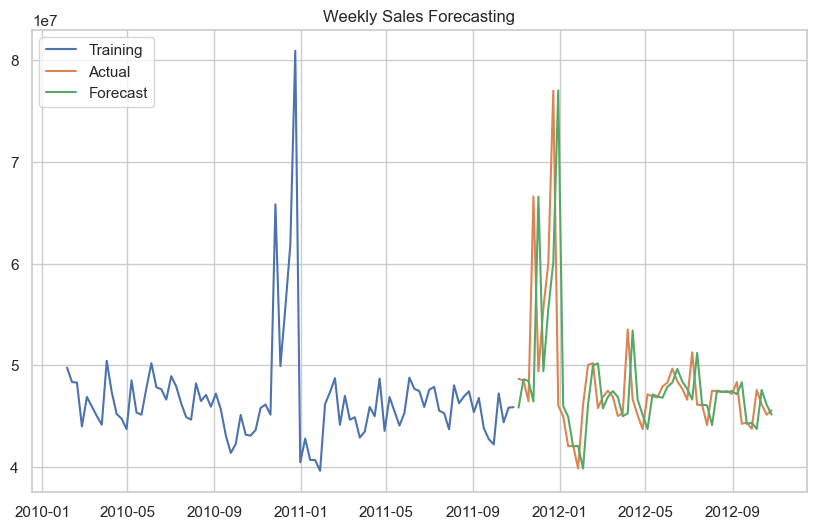

In [133]:
# Forecast for the test period
forecast = model_fit.forecast(steps=len(test))

# Plot the forecast against the actual values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.legend(loc='upper left')
plt.title('Weekly Sales Forecasting')
plt.show()

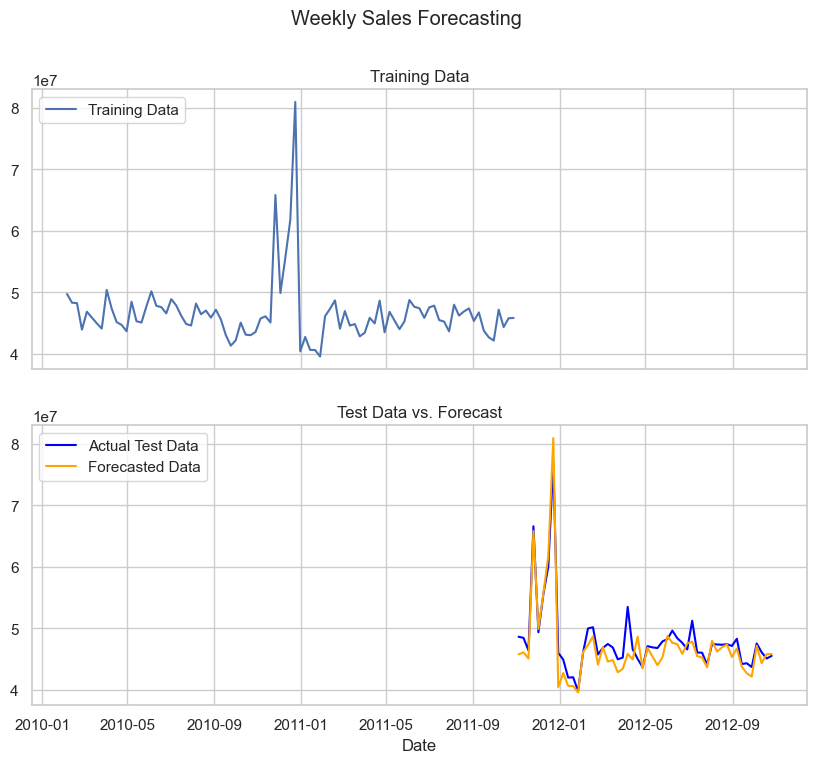

In [134]:
import matplotlib.pyplot as plt

# Forecast for the test period
forecast = best_model.forecast(steps=len(test))

# Plot the training and test data with forecasts in two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Upper subplot for training data
ax1.plot(train.index, train, label='Training Data')
ax1.set_title('Training Data')
ax1.legend(loc='upper left')

# Lower subplot for test data and forecasts
ax2.plot(test.index, test, label='Actual Test Data', color='blue')
ax2.plot(test.index, forecast, label='Forecasted Data', color='orange')
ax2.set_title('Test Data vs. Forecast')
ax2.legend(loc='upper left')

# Set common x-axis label and overall title
fig.suptitle('Weekly Sales Forecasting')
plt.xlabel('Date')
plt.show()

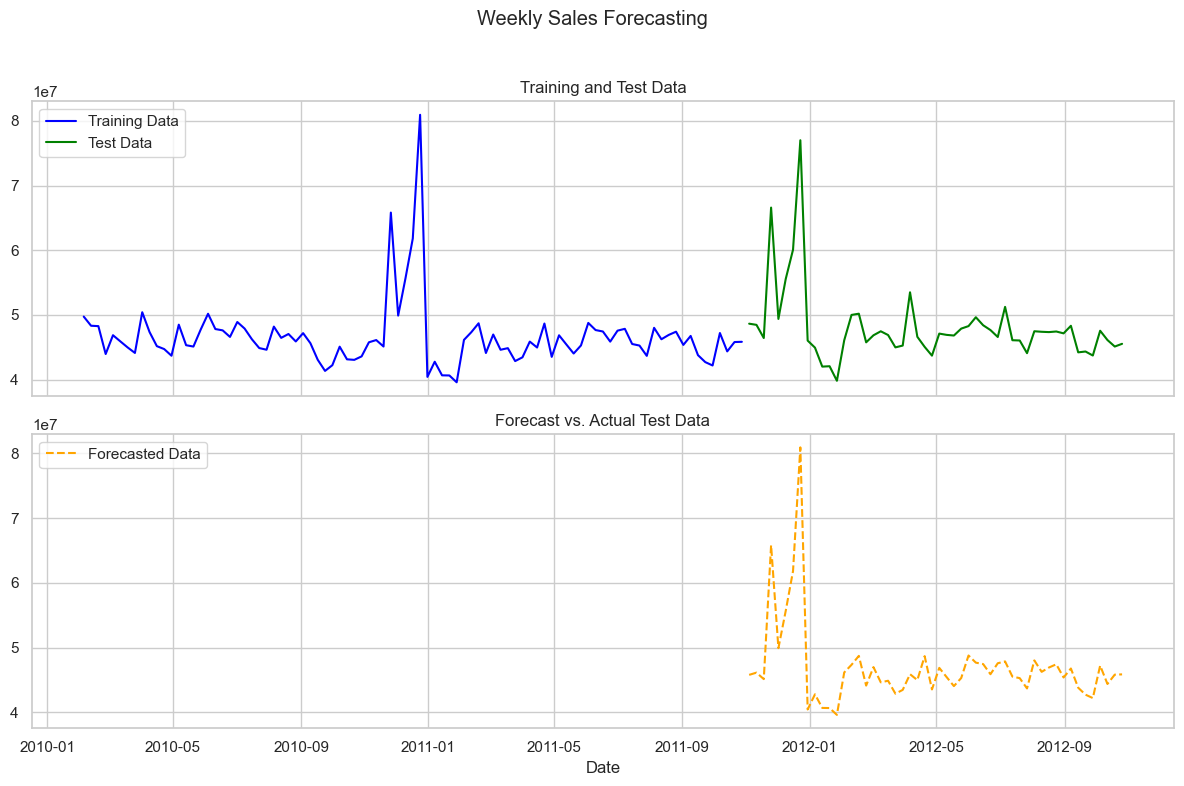

In [137]:
# Forecast for the test period
forecast = best_model.forecast(steps=len(test))

# Plot the training and test data in the upper plot, and forecast vs. actual test data in the lower plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Upper subplot for training and test data
ax1.plot(train.index, train, label='Training Data', color='blue')
ax1.plot(test.index, test, label='Test Data', color='green')
ax1.set_title('Training and Test Data')
ax1.legend(loc='upper left')

# Lower subplot for forecast vs. actual test data
# ax2.plot(test.index, test, label='Actual Test Data', color='green')
ax2.plot(test.index, forecast, label='Forecasted Data', color='orange', linestyle='--')
ax2.set_title('Forecast vs. Actual Test Data')
ax2.legend(loc='upper left')

# Set common labels
fig.suptitle('Weekly Sales Forecasting')
plt.xlabel('Date')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [138]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(test, predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))

# Calculate MAPE
mape = np.mean(np.abs((test.values - predictions) / test.values)) * 100

# Calculate Accuracy as a Percentage (1 - MAPE/100)
accuracy_percentage = 100 - mape

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Accuracy: {accuracy_percentage}%")

Mean Absolute Error (MAE): 1597388.9843509782
Root Mean Squared Error (RMSE): 2128341.2950878763
Mean Absolute Percentage Error (MAPE): 10.139488649094087%
Accuracy: 89.86051135090591%


In [141]:
future_forecast

2011-11-04    45781981.89
2011-11-11    46124800.83
2011-11-18    45125584.18
2011-11-25    65821003.24
2011-12-02    49909027.88
2011-12-09    55666770.39
2011-12-16    61820799.85
2011-12-23    80931415.60
2011-12-30    40432519.00
2012-01-06    42775787.77
2012-01-13    40673678.04
2012-01-20    40654648.03
2012-01-27    39599852.99
2012-02-03    46153111.12
2012-02-10    47336192.79
2012-02-17    48716164.12
2012-02-24    44125859.84
2012-03-02    46980603.74
2012-03-09    44627319.40
2012-03-16    44872325.97
2012-03-23    42876199.18
2012-03-30    43458991.19
2012-04-06    45887466.80
2012-04-13    44973328.14
2012-04-20    48676692.06
2012-04-27    43530032.78
2012-05-04    46861958.29
2012-05-11    45446144.82
2012-05-18    44046598.01
2012-05-25    45293457.04
2012-06-01    48771994.18
2012-06-08    47669734.66
2012-06-15    47447561.77
2012-06-22    45884094.58
2012-06-29    47578519.50
2012-07-06    47859263.78
2012-07-13    45515929.92
2012-07-20    45274411.39
2012-07-27  

### Forecast with future 52 Weeks

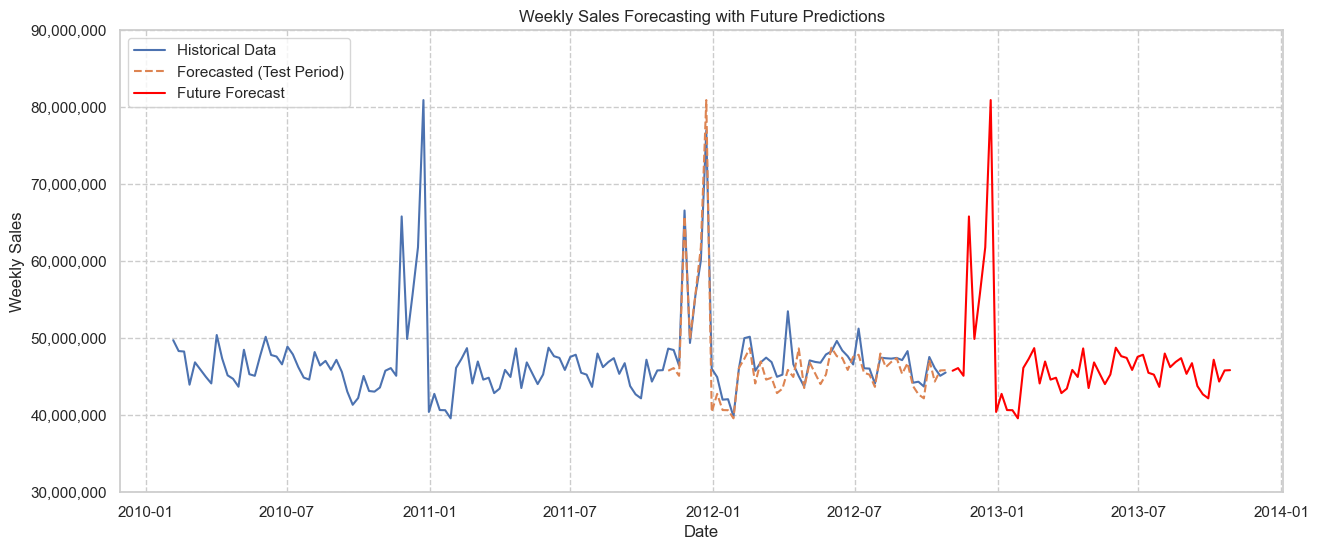

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have weekly_sales and best_model already defined

# Step 1: Extend the Forecast
# Number of future weeks to forecast
future_weeks = 52  # Example: forecast for next year (52 weeks)

# Create a date range for future predictions
last_date = weekly_sales.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=7), periods=future_weeks, freq='W')

# Use the best model to forecast future values
future_forecast = best_model.forecast(steps=future_weeks)

# Step 2: Plot the Results
plt.figure(figsize=(15, 6))

# Plot historical data
plt.plot(weekly_sales.index, weekly_sales['weekly_sales'], label='Historical Data')

# Plot test period forecast if test data is available
if 'test' in locals() and not test.empty:
    plt.plot(test.index, future_forecast[:len(test)], label='Forecasted (Test Period)', linestyle='--')

# Plot future forecast
plt.plot(future_dates, future_forecast[-future_weeks:], label='Future Forecast', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Forecasting with Future Predictions')
plt.legend(loc='upper left')

# Improve readability by adding grid lines
plt.grid(True, which="both", ls="--")


# Get the y-axis ticks and labels
y_ticks = plt.yticks()[0]
plt.yticks(y_ticks, [f'{value:,.0f}' for value in y_ticks])

# Show the plot
plt.show()